In [63]:
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support as score
import pydot
import os

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

from IPython.display import display, HTML
pd.options.display.max_rows = None
pd.options.display.max_columns = None

ModuleNotFoundError: No module named 'pydot'

# Question I: Revisiting HW4 Bank Classication with New Tools (for dataset A) 

# I. Loading the dataset and performing data preprocessing

> Load a simple dataset and perform some basic data preprocessing to fill out ”unknowns”,
outliers or other invalid data. Explain what preprocessing was performed and why. Also,
change categorical data into numerical features using pandas.get dummies [5].

In [5]:
bank_addidtional_full = "bank-additional.csv"

data = pd.read_csv(bank_addidtional_full, sep = ';', na_values=["unknown"])
df = pd.DataFrame(data)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,NaN,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,NaN,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### We first check for missing values in the dataset. There was 1230 entries as unknown in the catogerical features that were replaced with NaN.

In [6]:
print(df.isnull().sum())
print(df.shape)
df.info()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64
(4119, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4080 non-null object
marital           4108 non-null object
education         3952 non-null object
default           3316 non-null object
housing           4014 non-null object
loan              4014 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          

# NaN values were replaced by the mode of the column

In [7]:
# df = df.fillna(df.mode().iloc[0])
df.drop(['default'], axis=1, inplace=True)

In [8]:
df.head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,cellular,nov,tue,68,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,no,no,telephone,may,thu,170,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### Then we convert all the catogrical columns to numerical columns. Also, dropping the duration column since is a predictive variable according to UCI website and should be dropped if the purpose is to build a realistic model

In [9]:
print(df.shape)
df._get_numeric_data().head()
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df.drop(['duration'], axis=1, inplace=True)
df = pd.get_dummies(df,drop_first=True)
display(df.head(5))

(4119, 20)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,1,0,0,0,0,0,0,0,1,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,1,0,0,0,0,0,0,0,1,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,0,1,1,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,0,0,1,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,0,1,0,0,1,0,0,0,1,0


In [10]:
df.shape

(4119, 46)

In [11]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('y')) #Remove y from list
df = df[cols + ['y']] #Create new dataframe with columns in the order you want
display(df.head(5))

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,...,0,0,0,0,0,0,0,1,0,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,0,0,1,0,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,1,0,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,1,0,0,0,1,0,0


In [12]:
# sns.boxplot(x=df['nr.employed'])
# df['cons.conf.idx'].value_counts()
# df['cons.conf.idx'].describe()
# data['pdays'].isna().sum().sum()

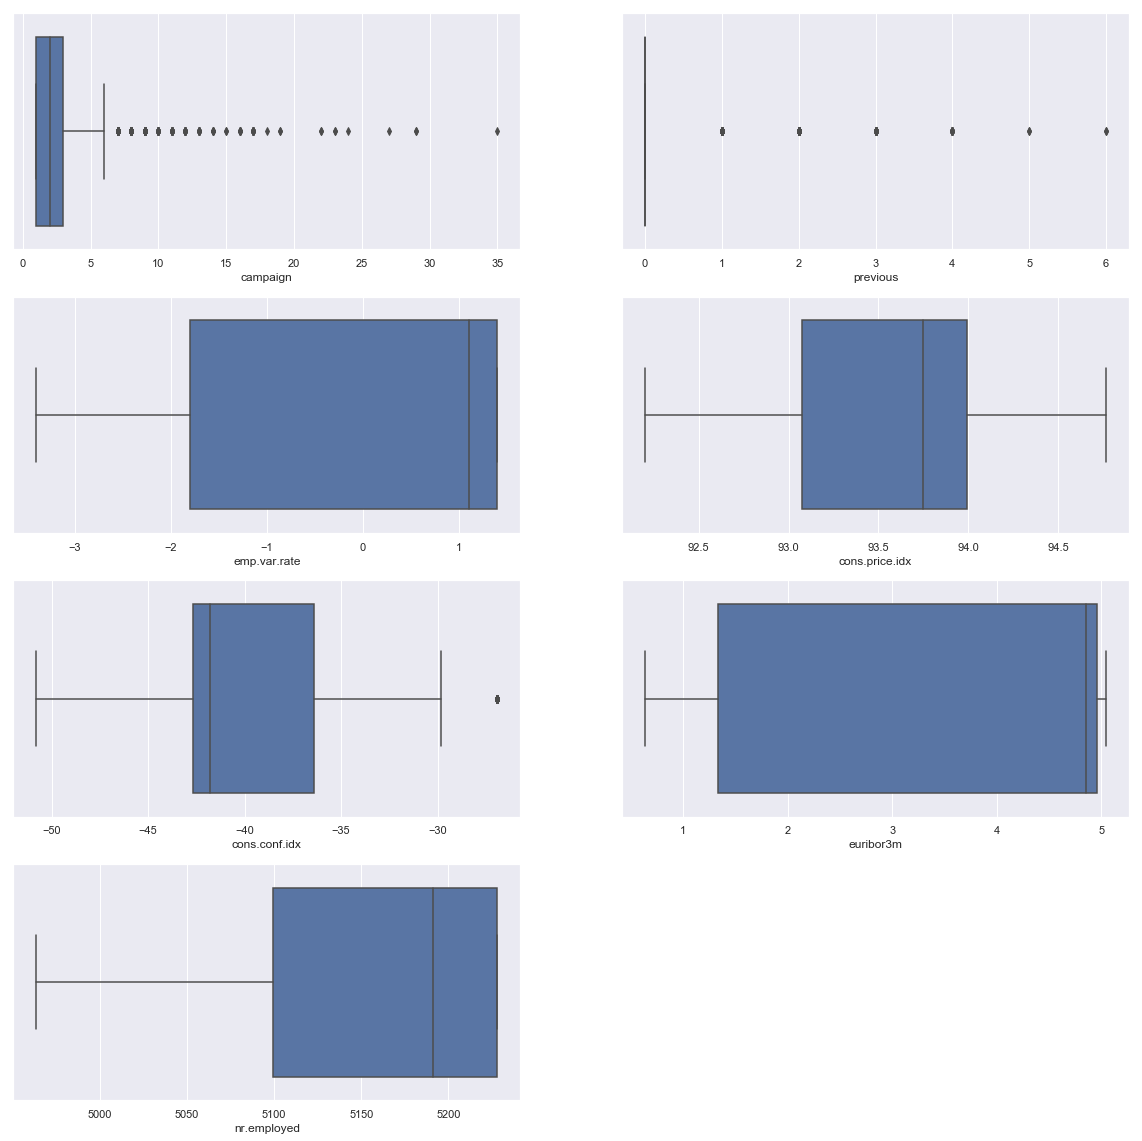

In [13]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

# columns = ('campaign', 'previous', 'emp.var.rate','cons.price.idx','cons.conf.idx',
#           'euribor3m', 'nr.employed')
# x_axis = np.arange(len(algorithms))
# dt_trueP = confusion_matrix(y_test,y_pred_dt)[1][1]
# rf_trueP = confusion_matrix(y_test,RFC_pred)[1][1]
# nn_trueP = confusion_matrix(y_true,y_pred)[1][1]
# trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
sns.boxplot(x=df['campaign'])

plt.subplot(4, 2, 2)
sns.boxplot(x=df['previous'])

plt.subplot(4, 2, 3)
sns.boxplot(x=df['emp.var.rate'])

plt.subplot(4, 2, 4)
sns.boxplot(x=df['cons.price.idx'])

plt.subplot(4, 2, 5)
sns.boxplot(x=df['cons.conf.idx'])

plt.subplot(4, 2, 6)
sns.boxplot(x=df['euribor3m'])

plt.subplot(4, 2, 7)
sns.boxplot(x=df['nr.employed'])

     
plt.savefig(os.path.join('barcharts_algorithms.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()


In [14]:
# df.pdays = df.pdays.replace({999: np.nan })
# display(df.pdays.describe())
# sns.boxplot(x=df['pdays'])

In [15]:
# df.pdays = df.pdays.fillna(df.pdays.mean() + df.pdays.std()*6)
# sns.boxplot(x=df['pdays'])

### Now detecting the outliers and keeping samples that are only within 3 standard deviations

In [16]:
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

In [17]:
print(df.shape)
df.head()

(4119, 46)


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,...,0,0,0,0,0,0,0,1,0,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,0,0,1,0,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,1,0,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,1,0,0,0,1,0,0


In [70]:
df['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 46 columns):
age                              4119 non-null int64
campaign                         4119 non-null int64
pdays                            4119 non-null int64
previous                         4119 non-null int64
emp.var.rate                     4119 non-null float64
cons.price.idx                   4119 non-null float64
cons.conf.idx                    4119 non-null float64
euribor3m                        4119 non-null float64
nr.employed                      4119 non-null float64
job_blue-collar                  4119 non-null uint8
job_entrepreneur                 4119 non-null uint8
job_housemaid                    4119 non-null uint8
job_management                   4119 non-null uint8
job_retired                      4119 non-null uint8
job_self-employed                4119 non-null uint8
job_services                     4119 non-null uint8
job_student                      41

In [20]:
df.head(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y
0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,1,...,0,0,0,0,0,0,0,1,0,0
1,39,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,0,0,0,0,0,0,1,0,0
2,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,0,1,1,0,0
3,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,0,0,0,0,0,0,1,0,0
4,47,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,1,0,0,0,1,0,0
5,32,3,999,2,-1.1,94.199,-37.5,0.884,4963.6,0,...,0,0,1,0,1,0,0,0,0,0
6,32,4,999,0,-1.1,94.199,-37.5,0.879,4963.6,0,...,0,0,1,1,0,0,0,1,0,0
7,41,2,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,1,0,0,1,0,0,0,1,0,0
8,31,1,999,1,-0.1,93.200,-42.0,4.153,5195.8,0,...,1,0,0,0,0,1,0,0,0,0
9,35,1,999,0,1.1,93.994,-36.4,4.855,5191.0,1,...,0,0,0,0,1,0,0,1,0,0


# II. Dividing data into training and testing

Splitting the data into train and test data. The test data size chosen to be 30%.

In [21]:
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)

In [22]:
X_test.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3489,31,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,0,...,0,0,0,0,1,0,0,0,0,0
1380,45,2,999,0,1.4,94.465,-41.8,4.961,5228.1,1,...,0,0,0,0,0,0,1,0,1,0
1183,34,2,6,1,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,1,0,0,0,0,0,1,0,1
1320,58,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
74,31,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,0,0,0,0,0,1,0,1,0


# III. Applying classification: 

# a) Decision Tree

## First, the classifier was instantiated with the default parameters and then was tuned later for comparison

In [23]:
dtree = DecisionTreeClassifier(random_state=101)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## Predicting and evaluating the model

In [24]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[646  86]
 [ 69  23]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       732
           1       0.21      0.25      0.23        92

   micro avg       0.81      0.81      0.81       824
   macro avg       0.56      0.57      0.56       824
weighted avg       0.83      0.81      0.82       824



## AUC scores is plotted below to check for overfitting cases with depth of the tree

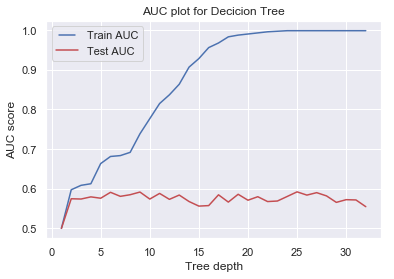

In [25]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Decicion Tree')
plt.savefig(os.path.join('1-3-DecisionTree_AUC.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

Based on the graph above, we see that when we have a high tree depth we get an overfitting case where the model can predicts the train data perfectly (high area under curve), however, the models fails to generalize and predict new data (test data)

In [26]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

In [27]:
dt_clf = clf_gini.fit(X_train, y_train)

In [28]:
y_pred_dt = dt_clf.predict(X_test)

In [65]:
print("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
print(tn, fp, fn, tp)
print('\n')
print(classification_report(y_test,y_pred_dt))

#print( np.unique(y_pred_dt ) )

Accuracy is  89.32038834951457
[[721  11]
 [ 77  15]]
721 11 77 15


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       732
           1       0.58      0.16      0.25        92

   micro avg       0.89      0.89      0.89       824
   macro avg       0.74      0.57      0.60       824
weighted avg       0.87      0.89      0.87       824

[0 1]


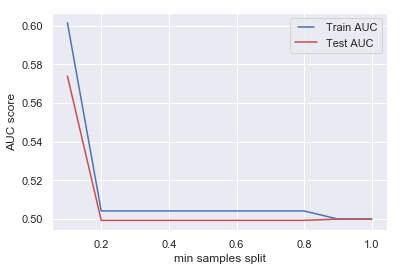

In [30]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [31]:
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_leaf in min_samples_leafs:
#    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
#    dt.fit(X_train, y_train)
#    train_pred = dt.predict(X_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = dt.predict(X_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
# line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel('AUC score')
# plt.xlabel('min samples leaf')
# plt.show()

## Tree Visualization using the the built-in visualization from Scikit learn. This requires to install the pydot library and Graphviz.

In [32]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)

ModuleNotFoundError: No module named 'pydot'

In [33]:
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 


NameError: name 'features' is not defined

# b) Random Forests (RF)

We will first fit the model with default parameters and evaluate the performance, then we will tune the parameters and compare the performance. 

In [79]:
rfc = RandomForestClassifier(random_state=101)
rfc_clf = rfc.fit(X_train, y_train)

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
rfc_pred = rfc_clf.predict(X_test)

In [81]:
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

Accuracy is  97.20708446866485
[[683  41]
 [  0 744]]


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       724
           1       0.95      1.00      0.97       744

   micro avg       0.97      0.97      0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



Similar to DT classifier, we will use the area under curve AUC to evaluate the model. 

In [82]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: Found input variables with inconsistent numbers of samples: [1468, 824]

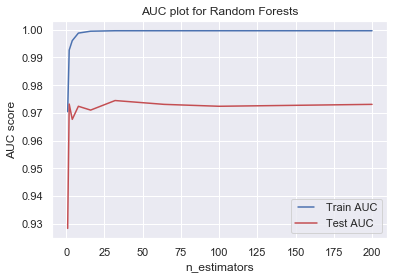

In [83]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(n_estimators).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

The n_estimators in the random forests classifier represents the numsber of trees used in the classifier. Based on the AUC graph above, we see that the highest AUC score for the test data will be around 16 n_estimators. Increasing the n_estimators decreases the test perfomance. 

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\ensemble\forest

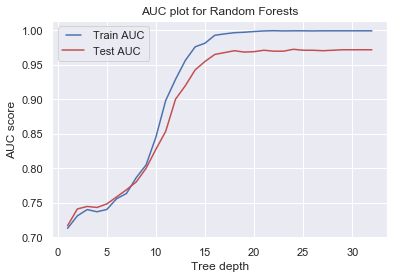

In [84]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=101)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for Random Forests')
plt.savefig(os.path.join('1-3-RandomForests_AUC(TreeDepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

We see that the higher the tree depth, we get an overfitting case. So a tree depth of 3 wil be chosen

In [85]:
RFC = RandomForestClassifier(n_estimators=16,random_state=101, max_depth=3)
RFC_clf = RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)


print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))

Results from the default parameters:
Accuracy is  97.20708446866485
[[683  41]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       724
           1       0.95      1.00      0.97       744

   micro avg       0.97      0.97      0.97      1468
   macro avg       0.97      0.97      0.97      1468
weighted avg       0.97      0.97      0.97      1468



Results from the tunned parameters:
Accuracy is  74.93188010899182
[[609 115]
 [253 491]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       724
           1       0.81      0.66      0.73       744

   micro avg       0.75      0.75      0.75      1468
   macro avg       0.76      0.75      0.75      1468
weighted avg       0.76      0.75      0.75      1468



# C) Neural Networks (NN)

Data should be normalized before training the neural network model. This is because the NN model might not converge before the max number of iterations allowed. Also, the multi-layer perception is sensitive to scaling the features. (source: https://www.kdnuggets.com/2016/10/beginners-guide-neural-networks-python-scikit-learn.html/2)



In [86]:
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

X_nn = df_feat.loc[:,]
y_nn = df['y']
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,y_nn, test_size=0.20,random_state=101)


C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
y_nn.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [88]:
# Testing with 2 layers with number of neurons:(36,36)
mlp = MLPClassifier(max_iter=1000,random_state=101)

In [89]:
nn_clf = mlp.fit(X_train_nn,y_train_nn)

predicting and evaluating

In [90]:
predictions = nn_clf.predict(X_test_nn)

In [91]:
print("Accuracy is ", accuracy_score(y_test,predictions)*100)
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [1468, 824]

Tunning the NN parameters using the GridSearchCV method.

In [47]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(32,32), (20,20), (47,47)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant'],
    'random_state': [101]
}

In [48]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)

In [49]:
clf.fit(X_train_nn, y_train_nn)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_iter': [2000], 'hidden_layer_sizes': [(32, 32), (20, 20), (47, 47)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam', 'lbfgs'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant'], 'random_state': [101]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 2000, 'random_state': 101, 'solver': 'sgd'}


In [51]:
mlp_nn = MLPClassifier(activation = 'tanh',alpha = 0.0001, learning_rate= 'constant', solver = 'sgd', random_state=101, hidden_layer_sizes=(20,20), max_iter=2000)

In [52]:
mlp_nn.fit(X_train_nn, y_train_nn)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=101, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [53]:
y_true, y_pred = y_test_nn , clf.predict(X_test_nn)

print("Results from the default parameters:")
print("Accuracy is ", accuracy_score(y_test,predictions)*100)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("\n")
print("Results from the tunned parameters:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))


Results from the default parameters:
Accuracy is  84.70873786407766
[[675  57]
 [ 69  23]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       732
           1       0.29      0.25      0.27        92

   micro avg       0.85      0.85      0.85       824
   macro avg       0.60      0.59      0.59       824
weighted avg       0.84      0.85      0.84       824



Results from the tunned parameters:
Accuracy is  89.19902912621359
[[718  14]
 [ 75  17]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.55      0.18      0.28        92

   micro avg       0.89      0.89      0.89       824
   macro avg       0.73      0.58      0.61       824
weighted avg       0.87      0.89      0.87       824



# IV. Creating plots of the models on the test data

# Plotting best two features

Normalized Data for Nural Network:

In [54]:
X_testnn_df =pd.DataFrame(X_test_nn, columns=df.columns[:-1]) 
y_testnn_df = pd.DataFrame(y_test_nn, columns = ['y'])
X_testnn_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3489,-0.883778,0.180203,0.201031,1.494607,-1.206054,-0.871264,-1.436846,-1.243440,-0.914779,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,-2.431270,-0.188958
1380,0.473849,-0.209228,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.772851,0.836535,1.912983,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,0.411308,-0.188958
1183,-0.592858,-0.209228,-4.973553,1.494607,-0.118350,-0.655478,-0.326707,0.287672,0.398028,-0.522744,...,-0.709039,2.869743,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,-2.431270,5.292168
1320,1.734503,0.180203,0.201031,-0.351356,0.649441,0.715193,0.892269,0.712852,0.332862,-0.522744,...,1.410360,-0.348463,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
74,-0.883778,-0.598660,0.201031,-0.351356,0.841389,-0.234264,0.957571,0.775735,0.836535,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,1.974270,-0.489050,0.411308,-0.188958


In [55]:
X_test_df =pd.DataFrame(X_test, columns=df.columns[:-1]) 
y_test_df = pd.DataFrame(y_test, columns = ['y'])
X_test_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
3489,31,3,999,1,-1.8,93.075,-47.1,1.466,5099.1,0,...,0,0,0,0,1,0,0,0,0,0
1380,45,2,999,0,1.4,94.465,-41.8,4.961,5228.1,1,...,0,0,0,0,0,0,1,0,1,0
1183,34,2,6,1,-0.1,93.200,-42.0,4.120,5195.8,0,...,0,1,0,0,0,0,0,1,0,1
1320,58,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
74,31,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,...,0,0,0,0,0,0,1,0,1,0


In [56]:
list(zip(X_test_df.columns, dt_clf.feature_importances_))

[('age', 0.019359732110182763),
 ('campaign', 0.0),
 ('pdays', 0.15399481636829276),
 ('previous', 0.0),
 ('emp.var.rate', 0.0),
 ('cons.price.idx', 0.0),
 ('cons.conf.idx', 0.0),
 ('euribor3m', 0.04578488853373634),
 ('nr.employed', 0.6937303356554206),
 ('job_blue-collar', 0.0),
 ('job_entrepreneur', 0.0),
 ('job_housemaid', 0.0),
 ('job_management', 0.0),
 ('job_retired', 0.0),
 ('job_self-employed', 0.0),
 ('job_services', 0.0),
 ('job_student', 0.0),
 ('job_technician', 0.0),
 ('job_unemployed', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('education_basic.6y', 0.0),
 ('education_basic.9y', 0.0),
 ('education_high.school', 0.0),
 ('education_illiterate', 0.0),
 ('education_professional.course', 0.0),
 ('education_university.degree', 0.0),
 ('housing_yes', 0.0),
 ('loan_yes', 0.0),
 ('contact_telephone', 0.03916215332392878),
 ('month_aug', 0.0),
 ('month_dec', 0.0),
 ('month_jul', 0.0),
 ('month_jun', 0.0),
 ('month_mar', 0.04796807400843859),
 ('month_may', 0.0),


In [ ]:
X = X_test_df.iloc[:, ]
X = X[['pdays','nr.employed']]
y= y_test_df['y']



label = ['Decision Tree', 'Random Forests']
clf_list = [clf_gini, RFC]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('nr.employed')
    plt.savefig(os.path.join('1-4-dT_RF_(pdaysVsnr.employed).png'), dpi=300, format='png', bbox_inches='tight')


plt.show()



Accuracy: 0.89 (+/- 0.00) [Neural Network]


NameError: name 'plot_decision_regions' is not defined

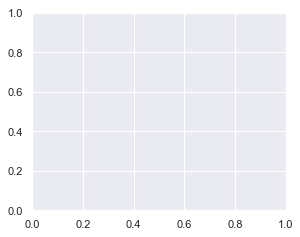

In [58]:
X = X_testnn_df.iloc[:, ]
X = X[['pdays','nr.employed']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('nr.employed')
    plt.savefig(os.path.join('1-4-NN_(pdaysVsnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



    
plt.show()

In [ ]:
X = X_test_df.iloc[:, ]
X = X[['nr.employed','euribor3m']]
y= y_test_df['y']



label = ['Decision Tree', 'Random Forests']
clf_list = [clf_gini, RFC]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('nr.employed')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-dT_RF_(euribor3mVSnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



plt.show()

In [ ]:
X = X_testnn_df.iloc[:, ]
X = X[['nr.employed','euribor3m']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('nr.employed')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-NN_(euribor3mVSnr.employed).png'), dpi=300, format='png', bbox_inches='tight')



    
plt.show()

In [ ]:
X = X_test_df.iloc[:, ]
X = X[['pdays','euribor3m']]
y= y_test_df['y']


label = ['Decision Tree', 'Random Forests']
clf_list = [clf_gini, RFC]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-dT_RF_(pdaysVSeuribor3m).png'), dpi=300, format='png', bbox_inches='tight')



plt.show()

In [ ]:
X = X_testnn_df.iloc[:, ]
X = X[['pdays','euribor3m']]
y= y_testnn_df['y']


label = ['Neural Network']
clf_list = [mlp_nn]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

X = X.values
y = y.values


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
    plt.xlabel('pdays')
    plt.ylabel('euribor3m')
    plt.savefig(os.path.join('1-4-NN_(pdaysVSeuribor3m).png'), dpi=300, format='png', bbox_inches='tight')


    
plt.show()

# V. Produce a table with the true/false positive/negative metrics as well as accuracies

In [78]:
print("Classification Report for Decision Tree:")
print("Accuracy is ", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print('\n')
print(classification_report(y_test,y_pred_dt))

print("Classification Report for Random Forests:")
print("Accuracy is ", accuracy_score(y_test,RFC_pred)*100)
print(confusion_matrix(y_test,RFC_pred))
print(classification_report(y_test,RFC_pred))


print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

Classification Report for Decision Tree:


ValueError: Found input variables with inconsistent numbers of samples: [1468, 824]

In [77]:
algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
ind = ['Accuracies (%)', 'True Positive', 'False Positive', 'False Negative', 'True Negative']
accuracies = [accuracy_score(y_test,y_pred_dt)*100,accuracy_score(y_test,RFC_pred)*100,accuracy_score(y_true,y_pred)*100]
true_negative = [confusion_matrix(y_test,y_pred_dt)[0][0], confusion_matrix(y_test,RFC_pred)[0][0],confusion_matrix(y_true,y_pred)[0][0]]
false_negative = [confusion_matrix(y_test,y_pred_dt)[0][1],confusion_matrix(y_test,RFC_pred)[0][1], confusion_matrix(y_true,y_pred)[0][1]]
false_positive = [confusion_matrix(y_test,y_pred_dt)[1][0],confusion_matrix(y_test,RFC_pred)[1][0],confusion_matrix(y_true,y_pred)[1][0]]
true_positive = [confusion_matrix(y_test,y_pred_dt)[1][1],confusion_matrix(y_test,RFC_pred)[1][1],confusion_matrix(y_true,y_pred)[1][1]]

arr1 = np.array([accuracies, true_positive,false_positive,false_negative,true_negative]) 
table_1 = pd.DataFrame(arr1, index = ind, columns = algorithms)

table_1

ValueError: Found input variables with inconsistent numbers of samples: [1468, 824]

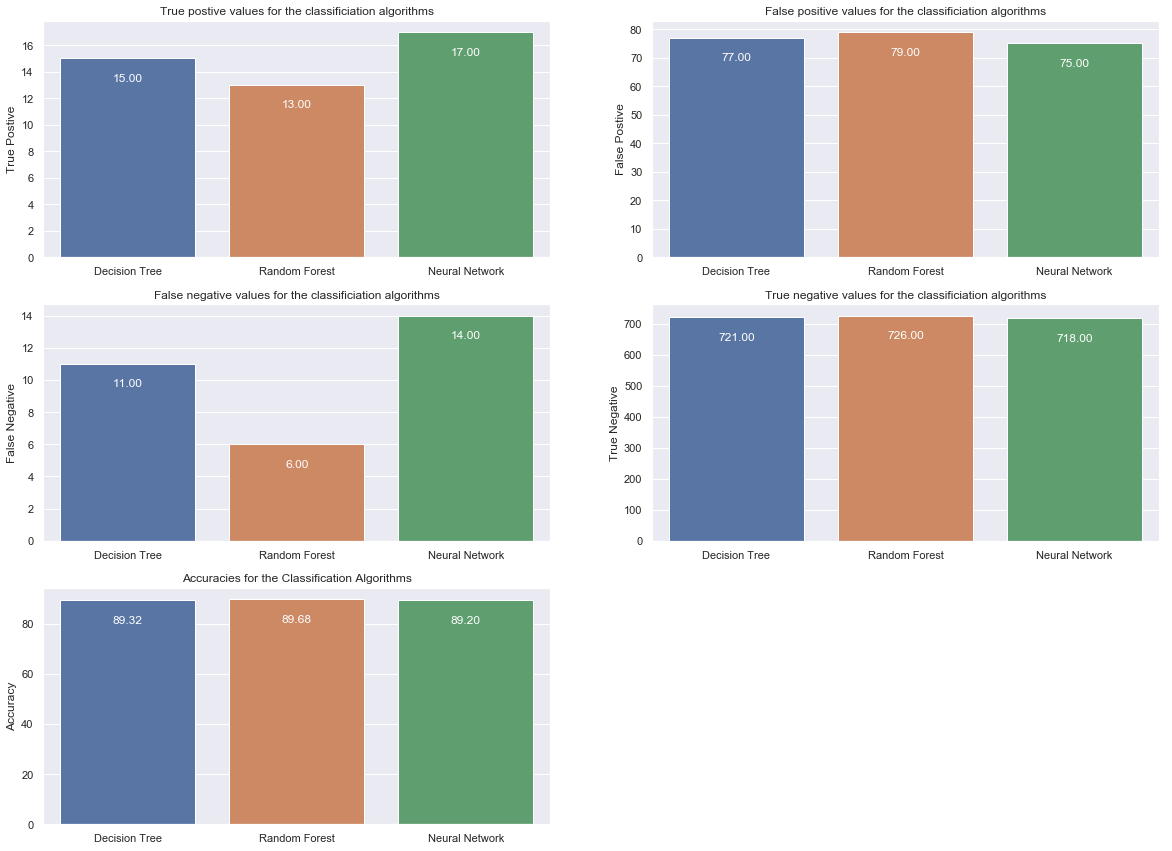

In [59]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
dt_trueP = confusion_matrix(y_test,y_pred_dt)[1][1]
rf_trueP = confusion_matrix(y_test,RFC_pred)[1][1]
nn_trueP = confusion_matrix(y_true,y_pred)[1][1]
trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
ax = sns.barplot(x_axis,trueP)
ax.set(ylabel ='True Postive', title='True postive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white',  xytext=(0, -20), textcoords='offset points') 

# plot False pOsitives
dt_falseP = confusion_matrix(y_test,y_pred_dt)[1][0]
rf_falseP = confusion_matrix(y_test,RFC_pred)[1][0]
nn_falseP = confusion_matrix(y_true,y_pred)[1][0]
falseP = [dt_falseP,rf_falseP,nn_falseP]
 
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,falseP)
ax.set(ylabel ='False Postive', title='False positive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points') 

# plot False Negatives
dt_falseN = confusion_matrix(y_test,y_pred_dt)[0][1]
rf_falseN = confusion_matrix(y_test,RFC_pred)[0][1]
nn_falseN = confusion_matrix(y_true,y_pred)[0][1]
falseN = [dt_falseN,rf_falseN,nn_falseN]
 
plt.subplot(4, 2, 3)
ax = sns.barplot(x_axis,falseN)
ax.set(ylabel ='False Negative', title='False negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')


# plot True Negatives

dt_trueN = confusion_matrix(y_test,y_pred_dt)[0][0]
rf_trueN = confusion_matrix(y_test,RFC_pred)[0][0]
nn_trueN = confusion_matrix(y_true,y_pred)[0][0]
trueN = [dt_trueN,rf_trueN,nn_trueN]

plt.subplot(4, 2, 4) 
ax = sns.barplot(x_axis,trueN)
ax.set(ylabel ='True Negative', title='True negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')



# plot Accurcacy
dt_accuracy = accuracy_score(y_test,y_pred_dt)*100
rf_accuracy = accuracy_score(y_test,RFC_pred)*100
nn_accuracy = accuracy_score(y_true,y_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 

 

plt.subplot(4, 2, 5)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for the Classification Algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')
        
plt.savefig(os.path.join('barcharts_algorithms.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()





### Handling imbalanced data Methods

In [ ]:
# There are several methods to handle imbalanced data (https://elitedatascience.com/imbalanced-classes)
# 1 Up-sample Minority Class
# 2 Down-sample Majority Class
# 3 Change Your Performance Metric
# 4 Penalize Algorithms (Cost-Sensitive Training)
# 5 Use Tree-Based Algorithms

### 1. Handling imbalanced data using Up-sample Minority Class

In [66]:
# https://elitedatascience.com/imbalanced-classes

# Separate majority and minority classes
df1_majority = df[df['y']==0]
df1_minority = df[df['y']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df1_minority, replace=True, n_samples=3668, random_state=99)     
# replace=True as it is sample with replacement
# n_samples is the target number of samples after the Up-sampling to match majority class
# random_state=99 for reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df1_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['y'].value_counts() 
# The new df has more observations than the original, and the ratio of the two classes is now 1:1
# 3668 observations for both classes

#print( np.unique(y_pred_dt ) )

1    3668
0    3668
Name: y, dtype: int64

### Train Test Split with the new Upsampled Dataframe

In [ ]:
X = df_upsampled.drop('y',axis=1)
y = df_upsampled['y']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=101)


### Training Decision Trees, Random Forests, and Neural Networks

In [76]:
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
dtree.fit(X_train,y_train)  
dtree_pred = dtree.predict(X_test)

rfc = RandomForestClassifier(n_estimators=16,random_state=101, max_depth=3)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

clf = MLPClassifier(activation = 'tanh',alpha = 0.0001, learning_rate= 'constant', solver = 'sgd', random_state=101, hidden_layer_sizes=(20,20), max_iter=2000)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

### Checking accurancy change after Up-sample Minority Class

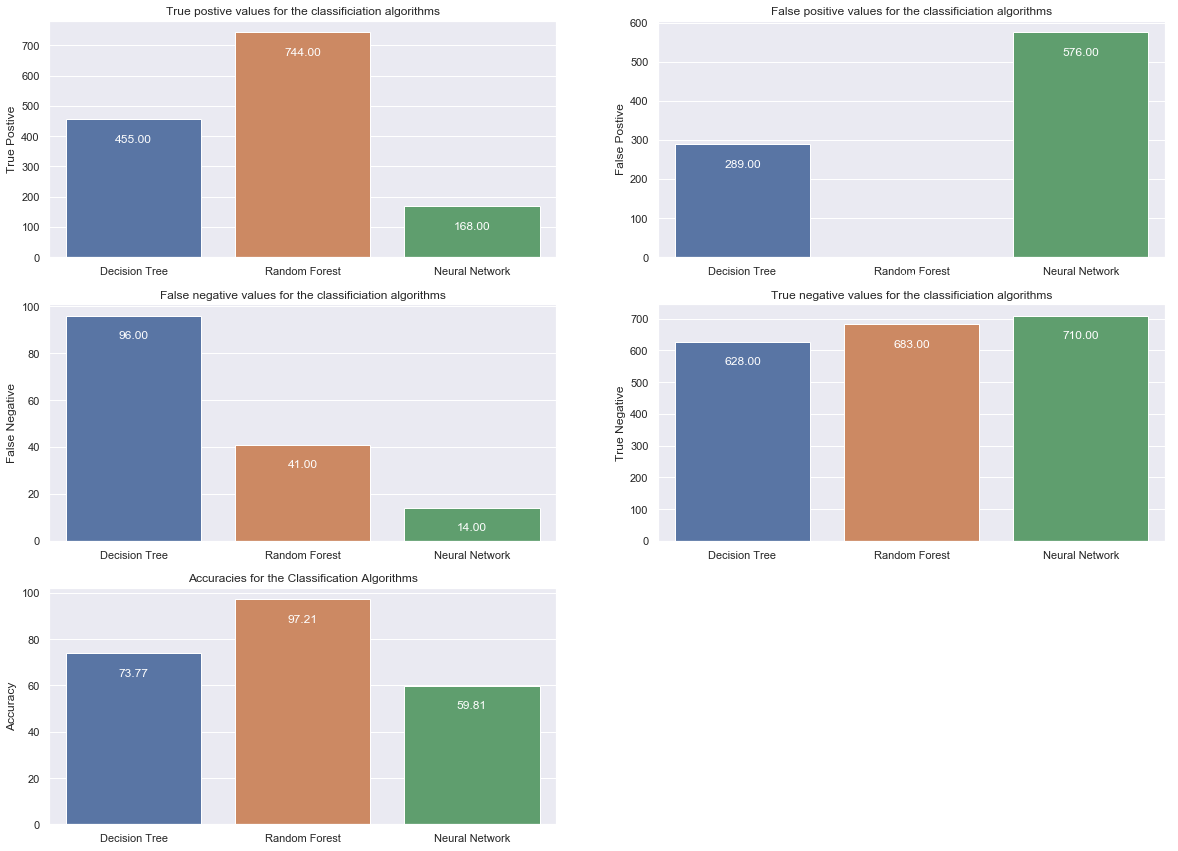

In [93]:
sns.set()
plt.figure(figsize=(20, 20))
# plot True positives

algorithms = ('Decision Tree', 'Random Forest', 'Neural Network')
x_axis = np.arange(len(algorithms))
dt_trueP = confusion_matrix(y_test,dtree_pred)[1][1]
rf_trueP = confusion_matrix(y_test,rfc_pred)[1][1]
nn_trueP = confusion_matrix(y_test,clf_pred)[1][1]
trueP = [dt_trueP,rf_trueP,nn_trueP]
 

plt.subplot(4, 2, 1) 
ax = sns.barplot(x_axis,trueP)
ax.set(ylabel ='True Postive', title='True postive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white',  xytext=(0, -20), textcoords='offset points') 

# plot False pOsitives
dt_falseP =confusion_matrix(y_test,dtree_pred)[1][0]
rf_falseP = confusion_matrix(y_test,rfc_pred)[1][0]
nn_falseP = confusion_matrix(y_test,clf_pred)[1][0]
falseP = [dt_falseP,rf_falseP,nn_falseP]
 
plt.subplot(4, 2, 2)
ax = sns.barplot(x_axis,falseP)
ax.set(ylabel ='False Postive', title='False positive values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points') 

# plot False Negatives
dt_falseN = confusion_matrix(y_test,dtree_pred)[0][1]
rf_falseN = confusion_matrix(y_test,rfc_pred)[0][1]
nn_falseN = confusion_matrix(y_test,clf_pred)[0][1]
falseN = [dt_falseN,rf_falseN,nn_falseN]
 
plt.subplot(4, 2, 3)
ax = sns.barplot(x_axis,falseN)
ax.set(ylabel ='False Negative', title='False negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')


# plot True Negatives

dt_trueN = confusion_matrix(y_test,dtree_pred)[0][0]
rf_trueN = confusion_matrix(y_test,rfc_pred)[0][0]
nn_trueN = confusion_matrix(y_test,clf_pred)[0][0]
trueN = [dt_trueN,rf_trueN,nn_trueN]

plt.subplot(4, 2, 4) 
ax = sns.barplot(x_axis,trueN)
ax.set(ylabel ='True Negative', title='True negative values for the classificiation algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', color = 'white', xytext=(0, -20), textcoords='offset points')



# plot Accurcacy
dt_accuracy = accuracy_score(y_test,dtree_pred)*100
rf_accuracy = accuracy_score(y_test,rfc_pred)*100
nn_accuracy = accuracy_score(y_test,clf_pred)*100
performance = [dt_accuracy,rf_accuracy,nn_accuracy]
 

 

plt.subplot(4, 2, 5)
ax = sns.barplot(x_axis,performance)
ax.set(ylabel ='Accuracy', title='Accuracies for the Classification Algorithms',xticklabels = algorithms)
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center',color = 'white', xytext=(0, -20), textcoords='offset points')

# Question 2: Parameter Selection and Classification (for dataset B)

# 1. Data loading and preprocessing using the Z-score normalization 

In [ ]:
dataB = pd.read_csv('DataDNA.csv', sep = ',', header= None)
df2 = pd.DataFrame(dataB)
print(df2.shape)
df2.head(10)

In [ ]:
print(df2.isnull().sum().sum())
# df2.iloc[:,:-1].head()
print(df2.shape)
df2.head()

In [ ]:
df2[57].value_counts()

In [ ]:
# df2[57] = df2[57].map({1: 1, -1: 0})

In [ ]:
df2[57].head()

In [ ]:
# # Z-score normalized values
normalized_df = df2.iloc[:,:-1]
std_scale = preprocessing.StandardScaler().fit(normalized_df)
df_std = std_scale.transform(normalized_df)
df_zscore = pd.DataFrame(df_std)
df_zscore.columns =  normalized_df.columns
df_zscore.head()

# 2.Parameter Selection: 

# a) K-NN

In [ ]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

# 5-fold cross-validation with k = [1, 3, 5, 7, 31] for KNN (the n_neighbors parameter)
k = [1, 3, 5, 7, 31]
k_scores = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    print("For k= {}, Accuracies: {}".format(i, scores))
    

print('\n')
print('Mean of accuracy scores:', k_scores)
print('\n')
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

plt.plot(k, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
# plt.title('')
plt.savefig(os.path.join('2-2-a-kNN.png'), dpi=300, format='png', bbox_inches='tight')



#ref: https://www.ritchieng.com/machine-learning-cross-validation/

# b) SVM (RBF Kernel)

In [ ]:
model = SVC()
param_grid = {'C': [0.1, 0.5, 1, 2, 5,10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}
grid = GridSearchCV(SVC(kernel='rbf'),param_grid,cv=5,refit=True)
grid.fit(X_train,y_train)
grid.best_params_

In [ ]:
#SVM GATHER DATA
rbf_svc = SVC(kernel='rbf', gamma=0.01, C=10,probability=True).fit(X_train,y_train)

#PREDICT PROBABILITY SCORE = 2D ARRAY FOR EACH PREDICTION
predictedprobSVC = rbf_svc.predict_proba(X_test)

#GET ROC DATA
fpr, tpr, thresholds = roc_curve(y_test, predictedprobSVC[:,1])
roc_auc = auc(fpr, tpr)

#GRAPH DATA
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
#plt.xlim([0.0, 1.0]
#plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.savefig(os.path.join('2-2-b-svm.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#ref :https://medium.com/datadriveninvestor/computing-an-roc-graph-with-python-a3aa20b9a3fb

# 3. Training classifiers and reporting the results:

# a) Classifying the test set using k-NN, SVM, Random Forests, and Neural Network

In [ ]:
X = df_zscore.loc[:,]
y = df2[57]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

Knn and SVM with chosen parameters from part 2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)

In [ ]:
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

In [ ]:
print("Classification Report for k-NN:")
print("Accuracy is ", accuracy_score(y_test,knn_pred)*100)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

print("Classification Report for SVM:")
print("Accuracy is ", accuracy_score(y_test,svm_pred)*100)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

Random Forest and Neural Network classifiers with default parameters

In [ ]:
rfc = RandomForestClassifier(random_state=42)
nn_mlp = MLPClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)
nn_mlp.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
print("Classification Report for Random Forests: ")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

print("Classification Report for Neural Network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))


# b) Exploring parameters for Random Forest and Neural Network

Random Forests

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(n_estimator).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()
# Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_estimators=25, n_jobs=-1, random_state=42)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title('AUC plot for RF')
plt.savefig(os.path.join('2-3-b-rf(Treedepth).png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#Source: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

In [ ]:
rfc_tunned = RandomForestClassifier(n_estimators=25,random_state=42, max_depth=3)

In [ ]:
rfc_tuned = rfc_tunned.fit(X_train, y_train)
rfc_tuned_pred = rfc_tunned.predict(X_test)

In [ ]:
print("Results from the default parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))
print('\n')
print("Results from the tuned parameters for Random forests:")
print("Accuracy is ", accuracy_score(y_test,rfc_tuned_pred)*100)
print(confusion_matrix(y_test,rfc_tuned_pred))
print(classification_report(y_test,rfc_tuned_pred))

Neural Network

In [ ]:
nn_mlp = MLPClassifier(random_state=42)
nn_mlp.fit(X_train, y_train)
nn_mlp_pred = nn_mlp.predict(X_test)

In [ ]:
parameter_space = {
    'max_iter': [2000],
    'hidden_layer_sizes': [(39,39), (57,57),(57,57,57), (39,39,39)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'random_state': [42]
}

In [ ]:
nn_mlp_tunned = GridSearchCV(nn_mlp, parameter_space, n_jobs=-1, cv=5, refit=True)
nn_mlp_tunned.fit(X_train, y_train)

In [ ]:
# Best parameter set
print('Best parameters found:\n', nn_mlp_tunned.best_params_)

In [ ]:
nn_mlp_tunned = MLPClassifier(activation = 'relu',alpha = 0.05, learning_rate= 'constant', solver = 'lbfgs', random_state=42, hidden_layer_sizes=(57, 57, 57), max_iter=2000)
nn_mlp_tunned.fit(X_train, y_train)
y_true, y_pred = y_test, nn_mlp_tunned.predict(X_test)

print("Results from the default parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_test,nn_mlp_pred)*100)
print(confusion_matrix(y_test,nn_mlp_pred))
print(classification_report(y_test,nn_mlp_pred))
print("\n")
print("Results from the tunned parameters for the neural network:")
print("Accuracy is ", accuracy_score(y_true,y_pred)*100)
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))

# C) Varying the split of the training-test set

In [ ]:
testSizes = np.arange(0.60, 0.90, 0.015)
testSizes

In [ ]:
from time import time

X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)

accuracies= []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []


for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    t0=time()
    knn.fit(X_train, y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    knn_pred = knn.predict(X_test)
    classification_times.append(round(time()-t1, 3)) # Classification time rounded to 3 decimal in seconds
    accuracy = accuracy_score(y_test,knn_pred)
    precision,recall,fscore,support=score(y_test,knn_pred,average='macro')
    precisions.append(precision*100)
    recalls.append(recall*100)
    f_measures.append(fscore*100)
    accuracies.append(accuracy*100)
    

print("Results from k-NN classifier:")
performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
ind = ['Average', 'Standard deviation']
avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

array1 = np.array([avg, sd]) 
table_2 = pd.DataFrame(array1, index = ind, columns = performance)

table_2



In [ ]:
# X = df_zscore.loc[:,]
# y = df2[57]

# # Creating an array with test size range from 60% to 90%
# testSizes = np.arange(0.6, 0.90, 0.015)
# accuracies = []
# precisions = []
# recalls = []
# f_measures = []
# training_times = []
# classification_times = []

# for i in testSizes:
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
#     t0=time()
#     svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)
#     t0=time()
#     svm.fit(X_train,y_train)
#     training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
#     t1=time()
#     svm_pred = svm.predict(X_test)
#     classification_times.append(round(time()-t1, 3)
#     accuracy = accuracy_score(y_test,svm_pred)
#     precision,recall,fscore,support=score(y_test,svm_pred,average='macro')
#     precisions.append(precision*100)
#     recalls.append(recall*100)
#     f_measures.append(fscore*100)
#     accuracies.append(accuracy*100)
    
# performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
# ind = ['Average', 'Standard deviation']
# avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
# sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

# array1 = np.array([avg, sd]) 
# table_2 = pd.DataFrame(array1, index = ind, columns = performance)

# table_2



In [ ]:
X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)
accuracies = []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []

for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    t0=time()
    svm = SVC(kernel='rbf', gamma=0.01, C=10,random_state=42)
    t0=time()
    svm.fit(X_train,y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    svm_pred = svm.predict(X_test)
    classification_times.append(round(time()-t1, 3)
                                

    # Results:
#     accuracy = accuracy_score(y_test,svm_pred)
#     precision,recall,fscore,support=score(y_test,svm_pred,average='macro')
#     precisions.append(precision*100)
#     recalls.append(recall*100)
#     f_measures.append(fscore*100)
#     accuracies.append(accuracy*100)
    
# performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
# ind = ['Average', 'Standard deviation']
# avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
# sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

# array1 = np.array([avg, sd]) 
# table_2 = pd.DataFrame(array1, index = ind, columns = performance)

# table_2


In [ ]:
X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)

accuracies= []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []


for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    rfc_tunned = RandomForestClassifier(random_state=42)
    t0=time()
    rfc_tunned.fit(X_train, y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    rfc_tuned_pred = rfc_tunned.predict(X_test)
    classification_times.append(round(time()-t1, 3)) # Classification time rounded to 3 decimal in seconds
    accuracy = accuracy_score(y_test,rfc_tuned_pred)
    precision,recall,fscore,support=score(y_test,rfc_tuned_pred,average='macro')
    precisions.append(precision*100)
    recalls.append(recall*100)
    f_measures.append(fscore*100)
    accuracies.append(accuracy*100)
    

print("Third classifier: Results from random forests(default parameters)")
performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
ind = ['Average', 'Standard deviation']
avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

array1 = np.array([avg, sd]) 
table_2 = pd.DataFrame(array1, index = ind, columns = performance)

table_2




In [ ]:
X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)

accuracies= []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []


for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    nn_mlp = MLPClassifier(random_state=42)
    t0=time()
    nn_mlp.fit(X_train, y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    nn_mlp_pred = nn_mlp.predict(X_test)
    classification_times.append(round(time()-t1, 3)) # Classification time rounded to 3 decimal in seconds
    accuracy = accuracy_score(y_test,nn_mlp_pred)
    precision,recall,fscore,support=score(y_test,nn_mlp_pred,average='macro')
    precisions.append(precision*100)
    recalls.append(recall*100)
    f_measures.append(fscore*100)
    accuracies.append(accuracy*100)
    

print("Fourth classifier: Neural Network (default paramter)")
performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
ind = ['Average', 'Standard deviation']
avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

array1 = np.array([avg, sd]) 
table_2 = pd.DataFrame(array1, index = ind, columns = performance)

table_2



In [ ]:
X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)

accuracies= []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []


for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    rfc_tunned = RandomForestClassifier(n_estimators=25,random_state=42, max_depth=3)
    t0=time()
    rfc_tunned.fit(X_train, y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    rfc_tuned_pred = rfc_tunned.predict(X_test)
    classification_times.append(round(time()-t1, 3)) # Classification time rounded to 3 decimal in seconds
    accuracy = accuracy_score(y_test,rfc_tuned_pred)
    precision,recall,fscore,support=score(y_test,rfc_tuned_pred,average='macro')
    precisions.append(precision*100)
    recalls.append(recall*100)
    f_measures.append(fscore*100)
    accuracies.append(accuracy*100)
    

print("Fifth classifier: Results for random forests(tuned parameters)")
performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
ind = ['Average', 'Standard deviation']
avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

array1 = np.array([avg, sd]) 
table_2 = pd.DataFrame(array1, index = ind, columns = performance)

table_2





In [ ]:
X = df_zscore.loc[:,]
y = df2[57]

# Creating an array with test size range from 60% to 90%
testSizes = np.arange(0.6, 0.90, 0.015)

accuracies= []
precisions = []
recalls = []
f_measures = []
training_times = []
classification_times = []


for i in testSizes:
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=i,random_state=42)
    nn_mlp = MLPClassifier(activation = 'relu',alpha = 0.05, learning_rate= 'constant', solver = 'lbfgs', random_state=42, hidden_layer_sizes=(57, 57, 57))
    t0=time()
    nn_mlp.fit(X_train, y_train)
    training_times.append(round(time()-t0, 3)) # Training time rounded to 3 decimal in seconds
    t1=time()
    nn_mlp_pred = nn_mlp.predict(X_test)
    classification_times.append(round(time()-t1, 3)) # Classification time rounded to 3 decimal in seconds
    accuracy = accuracy_score(y_test,nn_mlp_pred)
    precision,recall,fscore,support=score(y_test,nn_mlp_pred,average='macro')
    precisions.append(precision*100)
    recalls.append(recall*100)
    f_measures.append(fscore*100)
    accuracies.append(accuracy*100)
    

print("Sixth classifier: Neural Network (tuned paramter)")
performance = ('Accuracy', 'Precision', 'Recall','F-measure','Training time(s)','Classification time(s)')
ind = ['Average', 'Standard deviation']
avg = [np.array(accuracies).mean(),np.array(precisions).mean(),np.array(recalls).mean(),np.array(f_measures).mean(),np.array(training_times).mean(),np.array(classification_times).mean()]
sd = [np.array(accuracies).std(),np.array(precisions).std(),np.array(recalls).std(),np.array(f_measures).std(),np.array(training_times).std(),np.array(classification_times).std()]

array1 = np.array([avg, sd]) 
table_2 = pd.DataFrame(array1, index = ind, columns = performance)

table_2


